In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/recommender_system

/content/drive/MyDrive/recommender_system


In [ ]:

# @title import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import sys, os
import pickle

In [ ]:
sys.path.append('/content/drive/MyDrive/recommender_system/src')


In [ ]:
from src.data_struct.split_train_test import split_train_test, split_train_test_temporal_ratio
from src.training.features_function import extract_features, create_feature_matrix
from src.visualization.plot_loss_rmse import plot


In [ ]:
# @title Load data
from src.data_struct.split_train_test import split_train_test, split_train_test_temporal_ratio
from src.training.features_function import extract_features, create_feature_matrix


def load_and_split_data(ratings_file='data/ml-32m/ratings.csv',
                        movies_file='data/ml-32m/movies.csv',
                        test_ratio=0.2,
                        random_state=42):
    """
    Load data and split into train/test : 80% for train and 20% for test

    """

    # Split data
    (userid_to_idx, idx_to_userid, data_train_by_user, data_test_by_user,
     movieid_to_idx, idx_to_movieid, data_train_by_movie, data_test_by_movie) = \
        split_train_test(ratings_file, 1 - test_ratio)

    # Load movies
    movies_df = pd.read_csv(movies_file)

    # Extract features
    feature_to_idx, idx_to_feature, movie_features, feature_movies = \
        extract_features(movies_file, movieid_to_idx)

    num_movies = len(movieid_to_idx)
    num_features = len(idx_to_feature)
    F, F_n = create_feature_matrix(movie_features, num_movies, num_features)

    print(f"  Users: {len(userid_to_idx)}")
    print(f"  Movies: {num_movies}")
    print(f"  Features: {num_features}")
    print(f"  Train: {sum(len(r) for r in data_train_by_user)} ratings")
    print(f"  Test: {sum(len(r) for r in data_test_by_user)} ratings\n")

    return {
        'userid_to_idx': userid_to_idx,
        'idx_to_userid': idx_to_userid,
        'movieid_to_idx': movieid_to_idx,
        'idx_to_movieid': idx_to_movieid,
        'data_train_by_user': data_train_by_user,
        'data_train_by_movie': data_train_by_movie,
        'data_test_by_user': data_test_by_user,
        'data_test_by_movie': data_test_by_movie,
        'movies_df': movies_df,
        'F': F,
        'F_n': F_n,
        'feature_to_idx': feature_to_idx,
        'idx_to_feature': idx_to_feature,
        'movie_features': movie_features
    }

data = load_and_split_data()

# train on dataset train

In [ ]:

# @title Train bias only
from src.training.train_bias_only import train_numba as train_bias
N = 50  # Number of iterations

lamda_bias = 0.01
gamma_bias = 0.01

results_bias = train_bias(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    lamda_bias, gamma_bias, N
)





Training Bias Only Model...
  lamda=0.01, gamma=0.01, N=50
  Iter   1/50: Train RMSE=0.8606, Test RMSE=0.8698
  Iter   5/50: Train RMSE=0.8468, Test RMSE=0.8562
  Iter  10/50: Train RMSE=0.8468, Test RMSE=0.8561
  Iter  15/50: Train RMSE=0.8467, Test RMSE=0.8560
  Iter  20/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  25/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  30/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  35/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  40/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  45/50: Train RMSE=0.8466, Test RMSE=0.8559
  Iter  50/50: Train RMSE=0.8466, Test RMSE=0.8560
  Completed in 18.61s
  Final Train RMSE: 0.8466
  Final Test RMSE: 0.8560



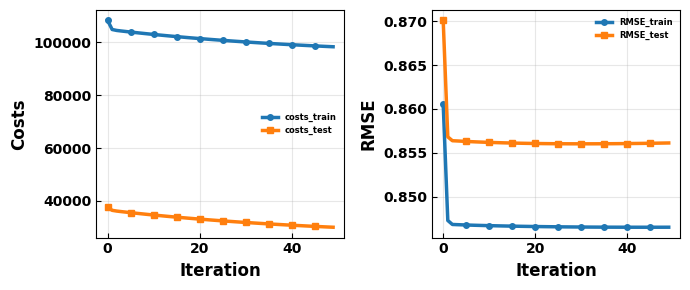

In [ ]:
from src.visualization.plot_loss_rmse import plot

plot(results_bias['costs_train'], results_bias['costs_test'],
     results_bias['rmse_train'], results_bias['rmse_test'])

In [ ]:
# @title Train for bias + Embedding

from src.training.train_parallelize import train as train_bias_embedding
N = 50  # Number of iterations

k = 10
lamda_emb = 0.1
gamma_emb = 0.05
tau_emb = 1.0

results_embedding = train_bias_embedding(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    k, lamda_emb, gamma_emb, tau_emb, N
)



 k=10
lamda=0.1, gamma=0.05, tau=1.0

Iteration   1/50	Train Loss: 1203660.2884	Train RMSE: 0.8331	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  42.72s
Iteration   5/50	Train Loss: 952160.9793	Train RMSE: 0.7266	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  44.42s
Iteration  10/50	Train Loss: 932179.3667	Train RMSE: 0.7187	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  55.79s
Iteration  15/50	Train Loss: 926855.5327	Train RMSE: 0.7173	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  53.77s
Iteration  20/50	Train Loss: 923850.2368	Train RMSE: 0.7168	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  59.82s
Iteration  25/50	Train Loss: 921633.0523	Train RMSE: 0.7166	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  56.31s
Iteration  30/50	Train Loss: 919794.6696	Train RMSE: 0.7165	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  55.37s
Iteration  35/50	Train Loss: 918177.3456	Train RMSE: 0.7164	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  52.95s
Iteration  40/50	Train Loss: 916707.5376	Train RM

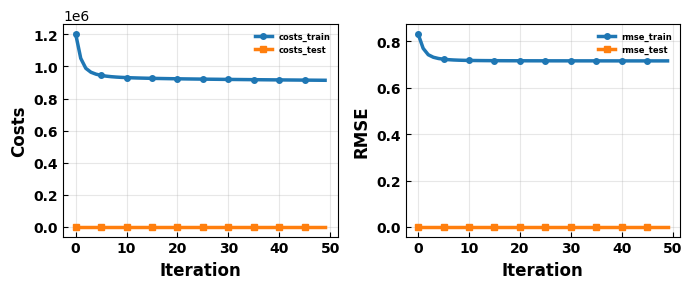

In [ ]:
from src.visualization.plot_loss_rmse import plot

plot(results_embedding['costs_train'], results_embedding['costs_test'],
     results_embedding['rmse_train'], results_embedding['rmse_test'])

In [ ]:
# @title train feature + bias +  embedding

from src.training.train_with_features import train_with_features
N = 50  # Number of iterations

k = 10
lamda_feat = 0.1
gamma_feat = 0.01
tau_feat = 1.0

results_features = train_with_features(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    data['F'], data['F_n'],
    k, lamda_feat, gamma_feat, tau_feat, N
)

# plot(results_features['costs_train'], results_features['costs_test'],
#      results_features['rmse_train'], results_features['rmse_test'])


Training with features:
  k=10, lamda=0.1, gamma=0.01, tau=1.0
  Users: 200948, Movies: 84432, Features: 19

Iteration   1/50	Train Loss: 1102167.2006	Train RMSE: 0.8030	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  41.18s
Iteration   5/50	Train Loss: 914651.6732	Train RMSE: 0.7284	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  61.18s
Iteration  10/50	Train Loss: 896432.2937	Train RMSE: 0.7238	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  78.84s
Iteration  15/50	Train Loss: 890298.9630	Train RMSE: 0.7227	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  76.59s
Iteration  20/50	Train Loss: 887125.7932	Train RMSE: 0.7222	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  73.55s
Iteration  25/50	Train Loss: 885129.3350	Train RMSE: 0.7218	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  75.00s
Iteration  30/50	Train Loss: 883683.7834	Train RMSE: 0.7216	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  71.67s
Iteration  35/50	Train Loss: 882508.3682	Train RMSE: 0.7214	Test Loss:     0.0000	Test RMSE:

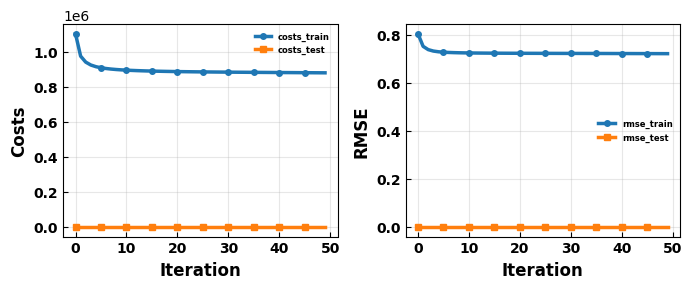

In [ ]:
from src.visualization.plot_loss_rmse import plot

plot(results_features['costs_train'], results_features['costs_test'],
     results_features['rmse_train'], results_features['rmse_test'])

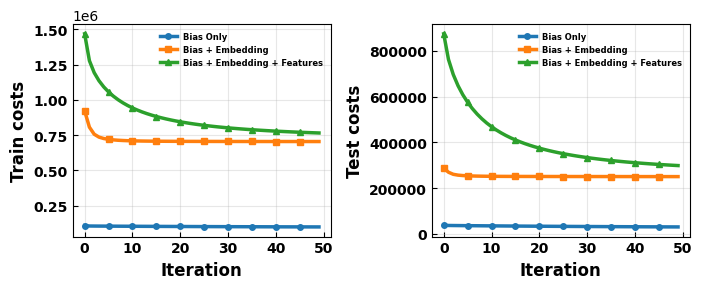

In [ ]:
from src.visualization.plot_compare import plot_compare_costs, plot_compare_rmse

plot_compare_costs(results_bias, results_embedding, results_features)

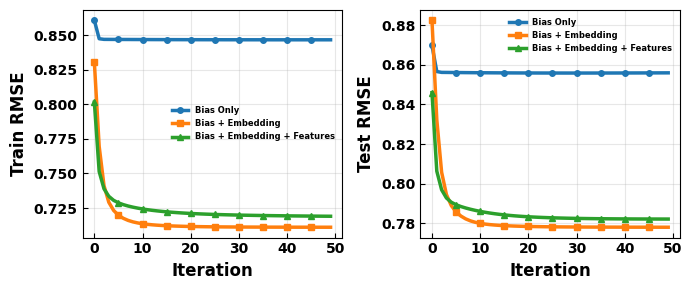

In [ ]:
plot_compare_rmse(results_bias, results_embedding, results_features)


# Retrain on full datasets

In [ ]:


from src.data_struct.split_train_test import split_train_test, split_train_test_temporal_ratio
from src.training.features_function import extract_features, create_feature_matrix

# Load data for retrain on full dataset
data = load_and_split_data(test_ratio = 0.0)

Loaded 100 lines...
Loaded 200 lines...
Loaded 300 lines...
Loaded 400 lines...
Loaded 500 lines...
Loaded 600 lines...
Loaded 700 lines...
Loaded 800 lines...
Loaded 900 lines...
Loaded 1000 lines...
Loaded 2000 lines...
Loaded 3000 lines...
Loaded 4000 lines...
Loaded 5000 lines...
Loaded 6000 lines...
Loaded 7000 lines...
Loaded 8000 lines...
Loaded 9000 lines...
Loaded 10000 lines...
Loaded 20000 lines...
Loaded 30000 lines...
Loaded 40000 lines...
Loaded 50000 lines...
Loaded 60000 lines...
Loaded 70000 lines...
Loaded 80000 lines...
Loaded 90000 lines...
Loaded 100000 lines...
Loaded 200000 lines...
Loaded 300000 lines...
Loaded 400000 lines...
Loaded 500000 lines...
Loaded 600000 lines...
Loaded 700000 lines...
Loaded 800000 lines...
Loaded 900000 lines...
Loaded 1000000 lines...
Loaded 2000000 lines...
Loaded 3000000 lines...
Loaded 4000000 lines...
Loaded 5000000 lines...
Loaded 6000000 lines...
Loaded 7000000 lines...
Loaded 8000000 lines...
Loaded 9000000 lines...
Loaded 100

In [ ]:
# @title train for bias only
from src.training.train_bias_only import train_numba as train_bias_only

N = 50  # Number of iterations


# Model 1: Bias Only
lamda_bias = 0.01
gamma_bias = 0.01

results_bias = train_bias_only(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    lamda_bias, gamma_bias, N
)



Training Bias Only Model...
  lamda=0.01, gamma=0.01, N=50
  Iter   1/50: Train RMSE=0.8614, Test RMSE=0.0000
  Iter   5/50: Train RMSE=0.8474, Test RMSE=0.0000
  Iter  10/50: Train RMSE=0.8473, Test RMSE=0.0000
  Iter  15/50: Train RMSE=0.8473, Test RMSE=0.0000
  Iter  20/50: Train RMSE=0.8473, Test RMSE=0.0000
  Iter  25/50: Train RMSE=0.8473, Test RMSE=0.0000
  Iter  30/50: Train RMSE=0.8472, Test RMSE=0.0000
  Iter  35/50: Train RMSE=0.8472, Test RMSE=0.0000
  Iter  40/50: Train RMSE=0.8472, Test RMSE=0.0000
  Iter  45/50: Train RMSE=0.8472, Test RMSE=0.0000
  Iter  50/50: Train RMSE=0.8472, Test RMSE=0.0000
  Completed in 28.33s
  Final Train RMSE: 0.8472
  Final Test RMSE: 0.0000



In [ ]:
# train bias + embedding
from src.training.train_parallelize import train as train_bias_embedding

N = 50
k = 10
lamda_emb = 0.1
gamma_emb = 0.10
tau_emb = 1.0

results_embedding = train_bias_embedding(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    k, lamda_emb, gamma_emb, tau_emb, N
)



 k=10
lamda=0.1, gamma=0.1, tau=1.0

Iteration   1/50	Train Loss: 1269834.5692	Train RMSE: 0.8328	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  14.49s
Iteration   5/50	Train Loss: 1009956.1044	Train RMSE: 0.7269	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  58.19s
Iteration  10/50	Train Loss: 983672.1744	Train RMSE: 0.7193	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  75.87s
Iteration  15/50	Train Loss: 973388.0165	Train RMSE: 0.7180	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  72.73s
Iteration  20/50	Train Loss: 966203.4569	Train RMSE: 0.7176	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  73.65s
Iteration  25/50	Train Loss: 960364.3994	Train RMSE: 0.7174	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  73.98s
Iteration  30/50	Train Loss: 955350.9263	Train RMSE: 0.7173	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  75.01s
Iteration  35/50	Train Loss: 950927.5041	Train RMSE: 0.7172	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  81.38s
Iteration  40/50	Train Loss: 946961.8650	Train RM

Training with features:
  k=10, lamda=0.1, gamma=0.5, tau=1.0
  Users: 200948, Movies: 84432, Features: 19

Iteration   1/50	Train Loss: 1700714.9736	Train RMSE: 0.8028	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  19.89s
Iteration   5/50	Train Loss: 1308305.2084	Train RMSE: 0.7327	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  77.53s
Iteration  10/50	Train Loss: 1176513.7678	Train RMSE: 0.7283	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  95.79s
Iteration  15/50	Train Loss: 1103815.7462	Train RMSE: 0.7264	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  96.19s
Iteration  20/50	Train Loss: 1057949.1935	Train RMSE: 0.7253	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  94.98s
Iteration  25/50	Train Loss: 1026697.8906	Train RMSE: 0.7246	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  97.71s
Iteration  30/50	Train Loss: 1004203.8639	Train RMSE: 0.7241	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  96.96s
Iteration  35/50	Train Loss: 987349.1627	Train RMSE: 0.7238	Test Loss:     0.0000	Test 

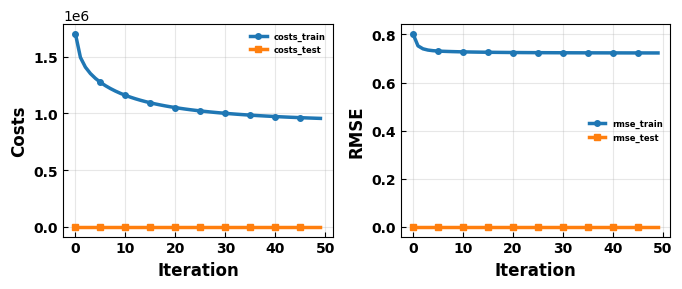

In [ ]:
# @title retrain feature + bias +  embedding

# Model 3: Bias + Embedding + Features
from src.training.train_with_features import train_with_features
k = 10
lamda_feat = 0.1
gamma_feat = 0.5
tau_feat = 1.0

results_features = train_with_features(
    data['data_train_by_user'],
    data['data_train_by_movie'],
    data['data_test_by_user'],
    data['F'], data['F_n'],
    k, lamda_feat, gamma_feat, tau_feat, N
)



In [ ]:
# @title Save results for bias + feature

with open("results_bias_only_full_dataset.pkl", "wb") as f:
    pickle.dump(results_embedding, f)


In [ ]:
with open("results_bias_embedding_full_dataset.pkl", "wb") as f:
    pickle.dump(results_embedding, f)

In [ ]:
with open("results_features_full_dataset.pkl", "wb") as f:
    pickle.dump(results_features, f)

In [ ]:
with open("results_bias_only_full_dataset.pkl", "rb") as f:
    results_bias_only = pickle.load(f)

In [ ]:
with open("results_features_full_dataset.pkl", "rb") as f:
    results_features = pickle.load(f)

In [ ]:
with open("results_bias_embedding_full_dataset.pkl", "rb") as f:
    results_embedding = pickle.load(f)

# Visualization

In [ ]:
# @title t-sne
from sklearn.manifold import TSNE

from matplotlib.lines import Line2D


In [ ]:

selected_movies = {
    'Action/Adventure': ['Lord of the Rings, The (1978)', 'Lord of the Rings: The Fellowship of',
                         'Lord of the Rings: The Two Towers', 'Lord of the Rings: The Return of the King'],
    'Family/Animation': ['Toy Story', 'Toy Story 2', 'Toy Story 3'],
    'Comedy': ['Home Alone', 'Home Alone 2', 'Home Alone 3'],
    'Horror': ['Halloween', 'Friday the 13th', 'Alien']
}

def find_movie_idx(title, movies_df, movieid_to_idx):
    """
    Find movie index by partial title match
    Input :
      title : title of the movie
      movies_df : dataframe for title and genre movie
      movieid_to_idx : dictionnary mapping the movieid to index in the structure
    Output:
      movieIdx, full_title
    """
    matches = movies_df[movies_df['title'].str.contains(title, case=False, na=False, regex=False)]
    if len(matches) > 0:
        movie_id = str(matches.iloc[0]['movieId'])
        if movie_id in movieid_to_idx:
            return movieid_to_idx[movie_id], matches.iloc[0]['title']
    return None, None


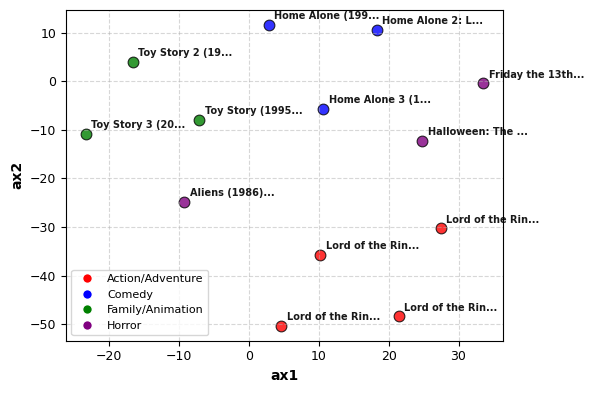

In [ ]:
# taking the indices and titles of the movie
movie_indices = {}
movie_titles_full = {}
for genre, titles in selected_movies.items():
    for title in titles:
        idx, full_title = find_movie_idx(title, data['movies_df'], data['movieid_to_idx'])
        if idx is not None:
            movie_indices.setdefault(genre, []).append(idx)
            movie_titles_full.setdefault(genre, []).append(full_title)

# the visualization via t-sne
v_emb = results_embedding['v']
selected_indices = [idx for indices in movie_indices.values() for idx in indices]
v_selected = v_emb[selected_indices]

tsne = TSNE(n_components=2, random_state=100, perplexity=4, max_iter=1000)
v_selected_2d = tsne.fit_transform(v_selected)

tsne_coords = dict(zip(selected_indices, v_selected_2d))

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 9})

colors = {
    'Action/Adventure': 'red',
    'Comedy': 'blue',
    'Family/Animation': 'green',
    'Horror': 'purple'
}

for genre, indices in movie_indices.items():
    for i, idx in enumerate(indices):
        x, y = tsne_coords[idx]
        plt.scatter(x, y, c=colors[genre], s=60, alpha=0.8,
                    edgecolors='black', linewidth=0.8)
        plt.annotate(movie_titles_full[genre][i][:15] + '...',
                     (x, y), fontsize=7, fontweight='bold', alpha=0.9,
                     xytext=(4, 4), textcoords='offset points')

plt.xlabel('ax1', fontsize=10, fontweight='bold')
plt.ylabel('ax2', fontsize=10, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)


legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=colors[g], markersize=7, label=g)
                   for g in colors]
plt.legend(handles=legend_elements, fontsize=8, loc='best', frameon=True)
plt.tight_layout()

# plt.savefig("embedding_of_some_movie.pdf", format="pdf", bbox_inches="tight",dpi=3000)
plt.show()


In [ ]:
from matplotlib.patches import Patch

def get_most_rated_movies_by_genre(genre_name, movie_features, feature_to_idx,
                                   data_train_by_movie, n_movies=20):
    """
    Get the n most rated movies for a specific genre

    Input:
        genre_name: Name of the genre
        movie_features: List where movie_features[movie_idx] = list of feature indices
        feature_to_idx: Dictionary mapping feature names to indices
        data_train_by_movie: List of ratings per movie
        n_movies: Number of top movies to select

    Output:
        List of (movie_idx, num_ratings) tuples
    """
    if genre_name not in feature_to_idx:
        print(f"Genre '{genre_name}' not found!")
        return []

    genre_idx = feature_to_idx[genre_name]

    # Find all movies with this genre and their rating counts
    movies_with_counts = []
    for movie_idx, features in enumerate(movie_features):
        if genre_idx in features:
            num_ratings = len(data_train_by_movie[movie_idx])
            movies_with_counts.append((movie_idx, num_ratings))

    # Sort by number of ratings (descending) and take top n
    movies_with_counts.sort(key=lambda x: x[1], reverse=True)

    return movies_with_counts[:n_movies]


Selecting most rated movies by genre...
Documentary    : 20 movies (avg ratings: 5760)
Animation      : 20 movies (avg ratings: 37201)
Children       : 20 movies (avg ratings: 40076)
Musical        : 20 movies (avg ratings: 24639)
Film-Noir      : 20 movies (avg ratings: 11358)
Horror         : 20 movies (avg ratings: 30063)

Applying t-SNE to 120 movie embeddings...


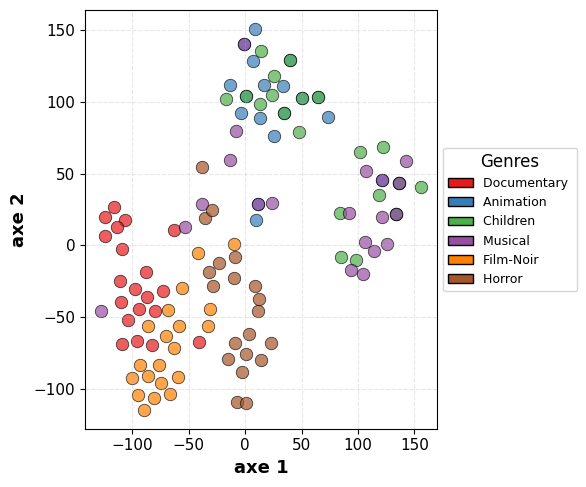


Plotted 120 movies across 6 genres
STATISTICS
Documentary    : min=  2851, max= 16169, avg=  5760 ratings
Animation      : min= 21483, max= 68997, avg= 37201 ratings
Children       : min= 26736, max= 68997, avg= 40076 ratings
Musical        : min= 14772, max= 51518, avg= 24639 ratings
Film-Noir      : min=  4541, max= 32831, avg= 11358 ratings
Horror         : min= 16824, max= 90330, avg= 30063 ratings


In [ ]:

# Select genres and number of movies per genre
selected_genres = ['Documentary', 'Animation', 'Children', 'Musical', 'Film-Noir', 'Horror']
movies_per_genre = 20

# Collect most rated movies for each genre
movie_indices = {}
movie_counts = {}

print("Selecting most rated movies by genre...")

for genre in selected_genres:
    movies = get_most_rated_movies_by_genre(
        genre,
        data['movie_features'],
        data['feature_to_idx'],
        data['data_train_by_movie'],
        movies_per_genre
    )

    if movies:
        movie_indices[genre] = [idx for idx, _ in movies]
        movie_counts[genre] = [count for _, count in movies]
        avg_ratings = np.mean(movie_counts[genre])
        print(f"{genre:15s}: {len(movies)} movies (avg ratings: {avg_ratings:.0f})")
    else:
        print(f"{genre:15s}: No movies found!")

# Prepare data for t-SNE
v_emb = results_embedding['v']

# Collect all selected movie indices
all_indices = []
all_genres = []
for genre, indices in movie_indices.items():
    all_indices.extend(indices)
    all_genres.extend([genre] * len(indices))

# Extract embeddings for selected movies
v_selected = v_emb[all_indices]

# Apply t-SNE
print(f"Applying t-SNE to {len(all_indices)} movie embeddings...")
tsne = TSNE(n_components=2, random_state=42, perplexity=15, max_iter=1000)
v_2d = tsne.fit_transform(v_selected)

# Plot movie embeddings
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams.update({'font.size': 11})

# Define colors for genres
colors = {
    'Documentary': 'Red',
    'Animation': 'Blue',
    'Children': 'Green',
    'Musical': 'Purple',
    'Film-Noir': 'Orange' ,
    'Horror':'Brownish Orange'
}

# Plot each movie
for i, genre in enumerate(all_genres):
    ax.scatter(v_2d[i, 0], v_2d[i, 1],
               c=colors[genre], s=80, alpha=0.7,
               edgecolors='black', linewidth=0.6)

ax.set_xlabel('axe 1', fontsize=13, fontweight='bold')
ax.set_ylabel('axe 2', fontsize=13, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.3)

# Create legend
legend_elements = [Patch(facecolor=colors[g], edgecolor='black',
                         label=f'{g} ')
                   for g in selected_genres if g in movie_indices]

ax.legend(handles=legend_elements, fontsize=9,
          loc='center left', bbox_to_anchor=(1, 0.5),
          frameon=True, title='Genres', title_fontsize=12)

plt.tight_layout()
plt.savefig('movie_embeddings_most_rated_tsne.pdf', format='pdf',
             bbox_inches='tight', dpi=300)
plt.show()

print(f"Plotted {len(all_indices)} movies across {len(movie_indices)} genres")



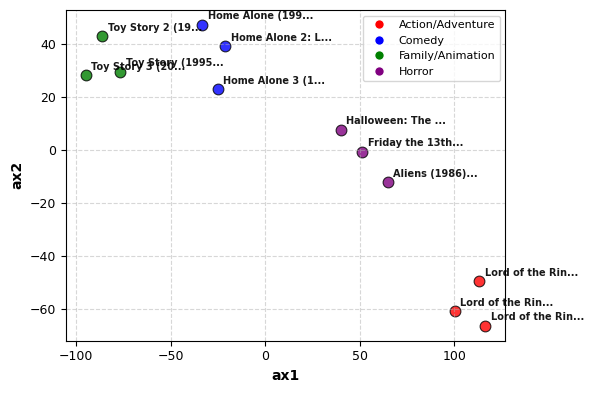

In [ ]:
#  @title movie embedding for features model

movie_indices = {}
movie_titles_full = {}
for genre, titles in selected_movies.items():
    for title in titles:
        idx, full_title = find_movie_idx(title, data['movies_df'], data['movieid_to_idx'])
        if idx is not None:
            movie_indices.setdefault(genre, []).append(idx)
            movie_titles_full.setdefault(genre, []).append(full_title)

v_feat = results_features['v']
selected_indices = [idx for indices in movie_indices.values() for idx in indices]
v_selected = v_feat[selected_indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=3, max_iter=1000)
v_selected_2d = tsne.fit_transform(v_selected)

tsne_coords = dict(zip(selected_indices, v_selected_2d))

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 9})

colors = {
    'Action/Adventure': 'red',
    'Comedy': 'blue',
    'Family/Animation': 'green',
    'Horror': 'purple'
}

for genre, indices in movie_indices.items():
    for i, idx in enumerate(indices):
        x, y = tsne_coords[idx]
        plt.scatter(x, y, c=colors[genre], s=60, alpha=0.8,
                    edgecolors='black', linewidth=0.8)
        plt.annotate(movie_titles_full[genre][i][:15] + '...',
                     (x, y), fontsize=7, fontweight='bold', alpha=0.9,
                     xytext=(4, 4), textcoords='offset points')

plt.xlabel('ax1', fontsize=10, fontweight='bold')
plt.ylabel('ax2', fontsize=10, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=colors[g], markersize=7, label=g)
                   for g in colors]
plt.legend(handles=legend_elements, fontsize=8, loc='best', frameon=True)
plt.tight_layout()
plt.savefig('movie_embeddings_features_tsne.pdf', format='pdf',
             bbox_inches='tight', dpi=300)
plt.show()


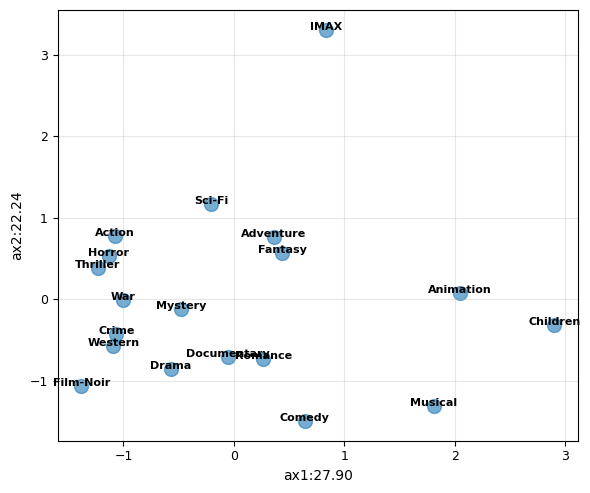

In [ ]:
# @title features embedding
from sklearn.decomposition import PCA

feature_vectors = results_features['f_vectors']
feature_name = [f_name for f_name in data['feature_to_idx'].keys()]

pca = PCA(n_components=2)
features_2d = pca.fit_transform(feature_vectors)
ratios = pca.explained_variance_ratio_

pc1 = ratios[0] * 100
pc2 = ratios[1] * 100

plt.figure(figsize=(6, 5))
plt.scatter(features_2d[:, 0], features_2d[:, 1], s=100, alpha=0.6)

for i, name in enumerate(feature_name):
    plt.annotate(name, (features_2d[i, 0], features_2d[i, 1]),
                fontsize=8, fontweight='bold',ha='center')

plt.xlabel(f'ax1:{pc1:.2f}', fontsize=10)
plt.ylabel(f'ax2:{pc2:.2f}', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('genre_embeddings.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# @title most polarizing

def find_polarizing_movies(movies_df,  v_emb, b_movie,
                                    data_train_by_movie, idx_to_movieid,
                                   min_ratings=500, top_k=20):
    results = []
    for movie_idx in range(len(v_emb)):
        ratings_list = data_train_by_movie[movie_idx]

        if len(ratings_list) < min_ratings:
            continue

        ratings = [r for _, r in ratings_list]
        mean_rating = np.mean(ratings)
        std_rating = np.std(ratings)

        movie_id = idx_to_movieid[movie_idx]
        movie_title = movies_df[movies_df['movieId'] == int(movie_id)]['title'].values

        if len(movie_title) > 0:
            v_norm = np.linalg.norm(v_emb[movie_idx])
            bias = b_movie[movie_idx]

            results.append({
                'movie_idx': movie_idx,
                'title': movie_title[0],
                'v_norm': v_norm,
                'bias': bias,
                'abs_bias': abs(bias),
                'mean': mean_rating,
                'std': std_rating,
                'num_ratings': len(ratings)
            })

    df = pd.DataFrame(results)

    polarizing = df[(df['std'] > 1.15)]
    polarizing = polarizing.sort_values('v_norm', ascending=False)

    return polarizing.head(top_k)

In [ ]:
data['movies_df'].columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:

# Find polarizing movies
print("Finding polarizing movies...")


polarizing_features_improved = find_polarizing_movies(
    data['movies_df'],
    v_emb=results_embedding['v'],
    b_movie=results_embedding['movie_biases'],
    data_train_by_movie=data['data_train_by_movie'],
    idx_to_movieid=data['idx_to_movieid'],
    min_ratings=500,
    top_k=20
)

print("Top 20 Most Polarizing Movies:")
print("-"*80)
print(f"{'Rank':<5} {'Title':<50} {'||v||':<8} {'Bias':<8} {'#Ratings':<10}")
print("-"*80)

result_polarizing = []

for i, row in polarizing_features_improved.iterrows():
    result_polarizing.append({
        "Rank": i + 1,
        "Title": row['title'][:48],
        "v_norm": row['v_norm']
    })
    print(f"{i+1:<5} {row['title'][:48]:<50} {row['v_norm']:<8.3f} {row['bias']:<8.3f} {row['num_ratings']:<10.0f}")



Finding polarizing movies...

Top 20 Most Polarizing Movies:
(High embedding norm + Low bias + Many ratings)
--------------------------------------------------------------------------------
Rank  Title                                              ||v||    Bias     #Ratings  
--------------------------------------------------------------------------------
152   Dumb & Dumber (Dumb and Dumber) (1994)             6.895    -0.122   36802     
341   Ace Ventura: When Nature Calls (1995)              5.940    -0.408   24849     
704   Borat: Cultural Learnings of America for Make Be   5.841    0.324    19566     
321   Natural Born Killers (1994)                        5.771    0.164    26472     
405   Saw (2004)                                         5.603    -0.042   12829     
1001  Twilight (2008)                                    5.592    -0.205   8882      
4320  Twilight Saga: Eclipse, The (2010)                 5.472    -0.254   4060      
306   Blair Witch Project, The (1999)    

# Recommendation

In [ ]:
# @title save recommendation
def save_recommendation(movie_recommendation, path):
  table_recommendation = movie_recommendation[["title","score"]].to_latex(index=False, float_format="%.3f")
  with open(path, "w") as f:
     f.write(table_recommendation)

In [ ]:

res = data['movies_df'][data['movies_df']['title'].str.contains("Lord of the Ring", case=False, na=False)]
display(res)

In [ ]:
list_id = [data['movieid_to_idx'][str(e)] for e in res['movieId'].values]
print(list_id)

In [ ]:
# @title recommendation for bias only
from src.prediction.recommendation import get_user_recommendations

dummy_data = [(339, 5.0)]
movie_idx_rated = [x[0] for x in dummy_data]

recommendation = get_user_recommendations(dummy_data, results_bias['movie_biases'],
                                  data['idx_to_movieid'],data['movies_df'],
                                   lamda_bias, gamma_bias, top_k=10)
recomm_bias_only = pd.DataFrame(recommendation)
recomm_bias_only

,rank,movie_idx,movie_id,title,genres,score
0,1,36131,177903,Near Death (1989),Documentary,3.960188
1,2,32266,222368,Crazy Romance (2019),Comedy|Romance,3.870105
2,3,70093,225435,Wesley (2009),(no genres listed),3.805187
3,4,16615,209193,Marriage Is A Crazy Thing (2002),Drama|Romance,3.800995
4,5,29463,240070,SpongeBob SquarePants: Heroes of Bikini Bottom...,Animation,3.772224
5,6,29497,270306,WWE: The Triumph and Tragedy of World Class Ch...,Action|Documentary,3.772224
6,7,29462,240054,SpongeBob SquarePants: Tide and Seek,Animation|Comedy,3.772224
7,8,43876,259323,The Cloud in Her Room (2020),Drama,3.739621
8,9,40160,210559,Black Harvest (1992),Documentary,3.703386
9,10,66306,159471,Evening's Civil Twilight in Empires of Tin (2008),(no genres listed),3.703151


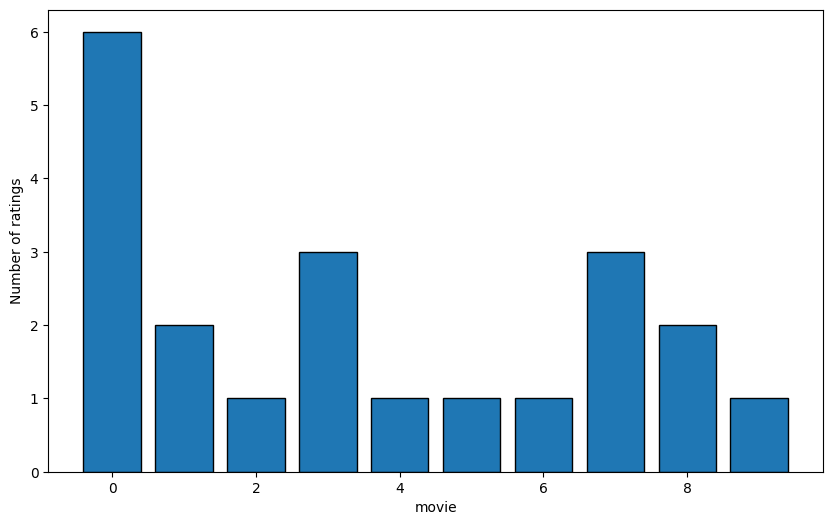

In [ ]:
def plot_ratings_distribution(movie_indices, data_by_movie):
    counts = [len(data_by_movie[j]) for j in movie_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(counts)), counts, edgecolor='black')
    plt.xlabel('movie')
    plt.ylabel('Number of ratings')
    plt.show()

plot_ratings_distribution(
lord_ring_recommendation['movie_idx'], data['data_train_by_movie'])

In [ ]:
# @title recommendation for embedding

from src.prediction.recommendation import get_user_recommendations_embedding
k = 10
lamda_feat = 0.1
gamma_feat = 0.01
tau_feat = 1.0

dummy_data = [(339, 5)] # lord of the ring
movie_idx_rated = [x[0] for x in dummy_data]

recommendation_features = get_user_recommendations_embedding(dummy_data, results_features['movie_biases'],
                                  results_features['v'], movie_idx_rated,data['idx_to_movieid'],
                                  data['movies_df'], k, lamda_feat, gamma_feat,
                                  tau_feat, top_k=10, bias_weight=1)
lord_recommendation_features = pd.DataFrame(recommendation_features)
lord_recommendation_features

,movie_idx,movie_id,title,genres,score
0,70688,276703,The Allman Brothers Band: Live at Great Woods ...,(no genres listed),0.242518
1,70591,178739,Kiss Me Kate (2003),(no genres listed),0.242518
2,70612,196959,I Am JFK Jr. (2016),(no genres listed),0.242518
3,70594,180585,The Man Who Came to Dinner (2000),(no genres listed),0.242518
4,70618,200314,The Portuguese Kid (2018),(no genres listed),0.242518
5,70639,217531,Deconstructing the Beatles' Abbey Road: Side One,(no genres listed),0.242518
6,70627,206963,The Yellow Brick Road and Beyond (2009),(no genres listed),0.200777
7,70647,227322,Citizen Hearst (2013),(no genres listed),0.200777
8,70576,133669,Boffo! Tinseltown's Bombs and Blockbusters,(no genres listed),0.200777
9,70587,165713,Rebel Beat: The story of LA Rockabilly (2007),(no genres listed),0.200777


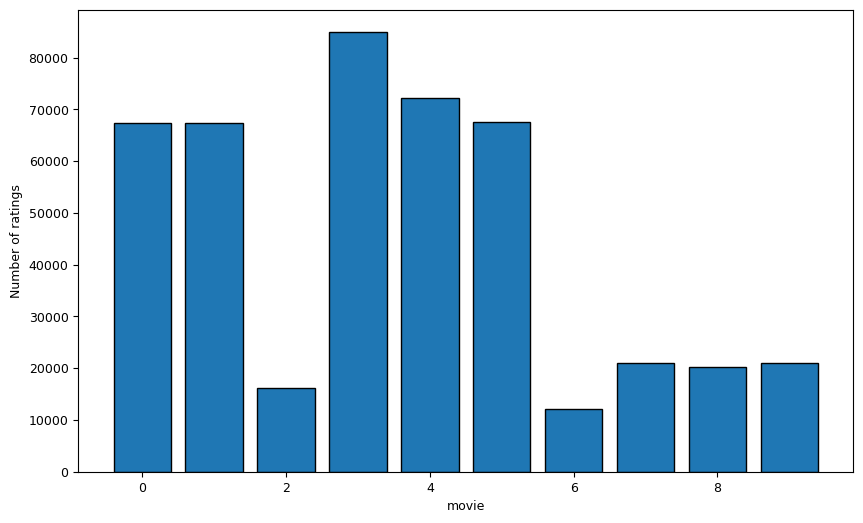

In [ ]:

plot_ratings_distribution(lord_ring_recommendation['movie_idx'], data['data_train_by_movie'])

In [ ]:
save_recommendation(lord_ring_recommendation, "toy_story_recommendation.tex")


In [ ]:
dummy_data = [(339, 5.0)]
movie_idx_rated = [x[0] for x in dummy_data]

recomm = get_user_recommendations_embedding(dummy_data, results_features['movie_biases'],
                                  results_features['v'], movie_idx_rated,data['idx_to_movieid'],
                                  data['movies_df'], k, lamda_feat, gamma_feat,
                                  tau_feat, top_k=10, bias_weight=0.05)
lord_ring_recommendation = pd.DataFrame(recomm)
lord_ring_recommendation

,movie_idx,movie_id,title,genres,score
0,613,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,1.406540
1,596,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,1.388364
2,888,98809,"Hobbit: An Unexpected Journey, The (2012)",Adventure|Fantasy|IMAX,0.937429
3,15,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,0.931152
4,53,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,0.927258
5,60,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,0.925305
6,902,106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX,0.920743
7,1440,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX,0.873266
8,1441,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX,0.859469
9,1439,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,0.855504


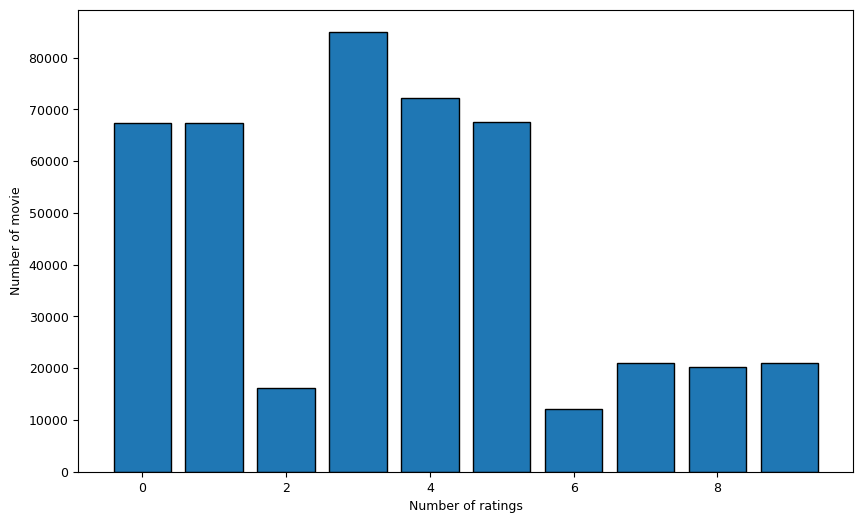

In [ ]:

plot_ratings_distribution(
lord_ring_recommendation['movie_idx'], data['data_train_by_movie'])

In [ ]:
#save_recommendation(lord_ring_recommendation, "final_feature_recommendation_0.05bias.tex")

In [ ]:
# hyperparameters for bias + embedding model
k = 10
lamda_emb = 0.1
gamma_emb = 0.05
tau_emb = 1.0


In [ ]:
# recommendation with bias+embedding model for lord of the ring

dummy_data = [(1819, 5.0)] # lord of the ring
movie_idx_rated = [x[0] for x in dummy_data]

recomm_lord = get_user_recommendations_embedding(dummy_data, results_embedding['movie_biases'],
                                  results_embedding['v'], movie_idx_rated ,data['idx_to_movieid'],
                                  data['movies_df'], k, lamda_emb, gamma_emb,
                                  tau_emb, top_k=10, bias_weight=1,model="without_features")
recomm_embedding = pd.DataFrame(recomm_lord)
recomm_embedding

,movie_idx,movie_id,title,genres,score
0,613,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,3.026879
1,596,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,2.965187
2,339,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,2.960898
3,70093,225435,Wesley (2009),(no genres listed),2.507714
4,44824,216789,Destination: Pluto Beyond the Flyby (2016),Documentary,2.494347
5,60,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,2.383534
6,29462,240054,SpongeBob SquarePants: Tide and Seek,Animation|Comedy,2.371522
7,29463,240070,SpongeBob SquarePants: Heroes of Bikini Bottom...,Animation,2.371522
8,29497,270306,WWE: The Triumph and Tragedy of World Class Ch...,Action|Documentary,2.371522
9,15,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2.338039


In [ ]:
# recommendation for toy story


dummy_data_toy_story = [(415, 5.0)]
movie_idx_rated = [x[0] for x in dummy_data_toy_story]

recomm = get_user_recommendations_embedding(dummy_data_toy_story, results_embedding['movie_biases'],
                                  results_embedding['v'], movie_idx_rated ,data['idx_to_movieid'],
                                  data['movies_df'], k, lamda_emb, gamma_emb,
                                  tau_emb, top_k=10, bias_weight=0.05,model="without_features")
toy_story_recommendation = pd.DataFrame(recomm)
toy_story_recommendation

,movie_idx,movie_id,title,genres,score
0,1287,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.829444
1,3080,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,1.753672
2,187,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,1.751068
3,184,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,1.663080
4,600,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,1.639902
5,495,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance,1.603320
6,5,34,Babe (1995),Children|Drama,1.589230
7,1248,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,1.586242
8,278,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1.571929
9,168,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,1.544117


In [ ]:
# recommendation for toy story with features model

recomm_feat = get_user_recommendations_embedding(dummy_data_toy_story, results_features['movie_biases'],
                                  results_features['v'], movie_idx_rated ,data['idx_to_movieid'],
                                  data['movies_df'], k, lamda_feat, gamma_feat,
                                  tau_feat, top_k=10, bias_weight=0.05)
toy_story_recommendation_feat = pd.DataFrame(recomm)
toy_story_recommendation_feat